In [1]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# Hyperparameters
lr = 1e-3
epochs = 500
batch_size = 128

In [3]:
'''
Let's build a custom dataset. In this, the samples are randomly initialised.
I.e, the dataset contains random numbers between 1 to 15
'''
classes = 15  # 1 to 15
data_size = 5000 #size of data
rand = np.random.RandomState(0)
samples = 0.4 + 0.1 * rand.randn(data_size)
data_values = np.digitize(samples, np.linspace(0.0, 1.0, 15))
data_values = data_values.astype('int32')
# This is basaically a histogram data....

In [4]:
'''splitting the data into train and test sets.
let's split data into 80% of train and 20% of test
'''
split = int(0.8*data_size)
train_set = data_values[:split]
test_set = data_values[split:]
train_set = train_set.reshape(train_set.shape[0],1)
test_set = test_set.reshape(test_set.shape[0],1)
train_set_shape = train_set.shape[0]
test_set_shape = test_set.shape[0]
print(train_set.shape,test_set.shape)

(4000, 1) (1000, 1)


(array([0.     , 0.0005 , 0.00475, 0.021  , 0.10125, 0.2165 , 0.28175,
        0.22675, 0.1075 , 0.034  , 0.005  , 0.001  , 0.     , 0.     ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 14 artists>)

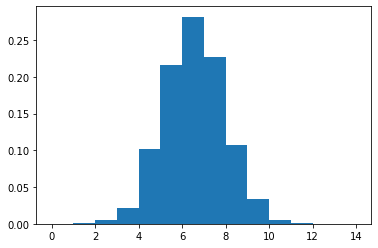

In [8]:
#lets check distribution of train data
distribution_length = classes
plt.hist(train_set, bins=np.arange(distribution_length) , label='train data', density=True)

In [9]:
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=False)
test_loader = data.DataLoader(test_set, batch_size=batch_size,shuffle = False)

In [10]:
#Histogram model
class Histogram(nn.Module):
    def __init__(self,classes):
        super().__init__()
        self.classes = classes
        self.weights = nn.Parameter(torch.zeros(self.classes,1), requires_grad=True)

    def loss(self, x):
        predicted = self.weights.repeat(x.shape[0],1)
        predicted = predicted.reshape(x.shape[0],self.classes)
        x = x.view(x.shape[0])
        return F.cross_entropy(predicted, x.long()),self.weights

In [11]:
model = Histogram(classes).to(device)

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [13]:
def train(model,train_loader):
    model.train()
    train_loss = []
    for i in range(epochs):
        cost = 0
        for data in train_loader:
            data = data.to(device)
            loss,parameters = model.loss(data)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            cost = cost + loss.item()
        if i% 25 == 0:
            print("For epoch ",i,"cost is:",cost/train_set_shape)
    return train_loss,parameters

In [14]:
train_loss,parameters = train(model,train_loader)

For epoch  0 cost is: 0.021520530700683594
For epoch  25 cost is: 0.016774381816387178
For epoch  50 cost is: 0.015154680877923965
For epoch  75 cost is: 0.014595046490430832
For epoch  100 cost is: 0.014360266953706742
For epoch  125 cost is: 0.01424303525686264
For epoch  150 cost is: 0.014177270889282226
For epoch  175 cost is: 0.014137110143899918
For epoch  200 cost is: 0.01411102631688118
For epoch  225 cost is: 0.014093447595834733
For epoch  250 cost is: 0.014081376880407333
For epoch  275 cost is: 0.014073000311851502
For epoch  300 cost is: 0.014067140012979507
For epoch  325 cost is: 0.014063010275363922
For epoch  350 cost is: 0.014060083359479903
For epoch  375 cost is: 0.014058000981807709
For epoch  400 cost is: 0.014056515693664551
For epoch  425 cost is: 0.014055454313755036
For epoch  450 cost is: 0.014054694801568984
For epoch  475 cost is: 0.014054151266813279


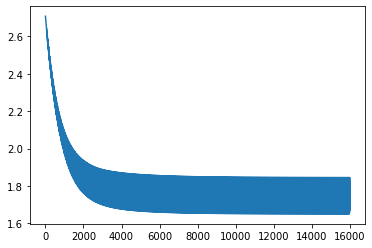

In [15]:
plt.plot(train_loss)

In [16]:
def test(model,test_loader):
    with torch.no_grad():
        cost = 0
        for data in test_loader:
            data = data.to(device)
            loss,parameters = model.loss(data)
            cost += loss.item()
        print("Test cost is",cost/test_set_shape)

In [17]:
test(model,test_loader)

Test cost is 0.01420771086215973


In [18]:
distribution = F.softmax(parameters, dim=0)
distribution = distribution.detach().cpu().numpy()

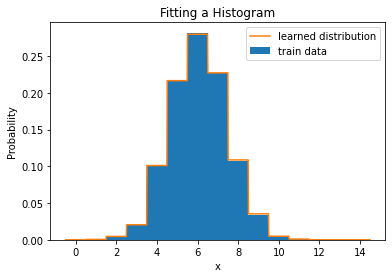

In [19]:
distribution_length = len(distribution)
plt.hist(train_set, bins=np.arange(distribution_length) - 0.5, label='train data', density=True)
x = np.linspace(-0.5, distribution_length - 0.5, 990)
y = distribution.repeat(1000 // distribution_length)
plt.plot(x, y, label='learned distribution')
plt.title('Fitting a Histogram')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [20]:
'''
This is a part of the assignment of the course Deep Unsupervised Learning by Pieter Abbel("https://sites.google.com/view/berkeley-cs294-158-sp20/home" )
Entire code is written by myself except those visualisations. The visualisations are taken from the course(In the course assignment, 
it is mentioned that visualisation plots are given along with Homework problem statements, so no need to code them explicitly)
'''
# Special thanks to Pieter Abbeel and the entire team of CS294-158-SP20

'\nThis is a part of the assignment of the course Deep Unsupervised Learning by Pieter Abbel("https://sites.google.com/view/berkeley-cs294-158-sp20/home" )\nEntire code is written by myself except those visualisations. The visualisations are taken from the course(In the course assignment, \nit is mentioned that visualisation plots are given along with Homework problem statements, so no need to code them explicitly)\n'